## Sillicon Valley : Model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Observation des performances des algorithmes de Scaling

Nous avons différentes techniques de Scaling : <br>
=> L'algorithmme MinmaxScaler <br>
=> L'algorithmme StandardScaler <br>
=> L'algorithmme RobustScaler <br>

#### Importation du dataset clean.

In [3]:
dataset = pd.read_csv("data/dataset_clean.csv")

In [4]:
dataset.head()

,longitude,latitude,Age moyen logement,Total pieces,Total chambres,Nb personne logement,Nb famille logement,Salaire median logement,Valeur moyenne logement,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0


#### Algorithme MinMaxScaler (Normalisation)

L'algorithme MinMaxScaler va transformer chaque variable de tel sorte à ce que les valeurs soit toutes comprise entre 0 et 1. <br>
Pour cela on soustrait chaque valeur d'une variable au minimum de cette variable <br>
Puis on divise par l'écart entre le maximum de la variable et le minimum de la variable

In [5]:
from sklearn.preprocessing import MinMaxScaler

#### Algorithme Standariser (Standarisation)

L'algorithme StandardScaler va transformer chaque variable de tel sorte à ce que chaque variable est une moyenne de 0 et un écart type égal à 1.
Pour cela il faut soustraire chaque valeur à la moyenne initiale de notre variable et diviser le tout par l'écart type initiale de la variable   

In [6]:
from sklearn.preprocessing import StandardScaler

#### Algorithme Robuster 

Comme nous l'avons constater précédemment, le dataset contient énormément d'outliers. <br>
Face à cette situation, nous avons une autre alternative que de supprimer les outliers. <br>
Nous pouvons utiliser l'algorithme RobusteScaler qui lui est très peu sensible aux outliers.

In [7]:
from sklearn.preprocessing import RobustScaler

#### Comparaison des différentes techniques de Scaling avec les données original.

In [8]:
X_array = np.array(dataset)

In [9]:
X_minmax = MinMaxScaler().fit_transform(X_array)
X_standard = StandardScaler().fit_transform(X_array)
X_robust = RobustScaler().fit_transform(X_array)

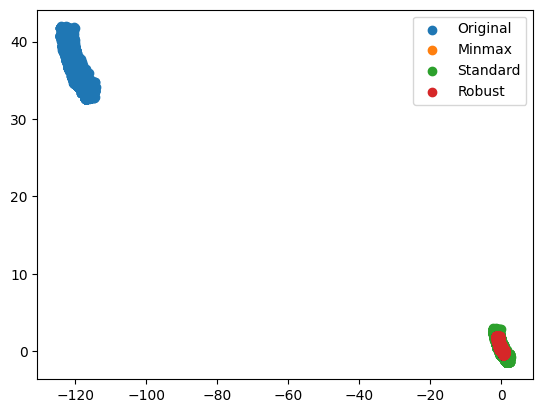

In [10]:
plt.scatter(X_array[:, 0], X_array[:, 1], label="Original")
plt.scatter(X_minmax[:, 0], X_minmax[:, 1], label="Minmax")
plt.scatter(X_standard[:, 0], X_standard[:, 1], label="Standard")
plt.scatter(X_robust[:, 0], X_robust[:, 1], label="Robust")
plt.legend()

## Scaling des données 

In [11]:
dataset.head()

,longitude,latitude,Age moyen logement,Total pieces,Total chambres,Nb personne logement,Nb famille logement,Salaire median logement,Valeur moyenne logement,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0


#### Choix des features & Scaling des données

Fonction permettent de scaler les features choisis.

In [12]:
def scaling(df, liste_delete="", liste_1=0, liste_2=0, liste_3=0):  
    # Suppression des features sélectionner.     
    if not liste_delete == "":
        df = df.drop(columns=liste_delete, axis=1)
    # Préparation des algorithmes de Scaling     
    minmax = MinMaxScaler()
    robust = RobustScaler()    
    standard = StandardScaler()
    # Scaling des features sélectionner     
    for i in liste_1:
        minmax.fit_transform(df[[i]])
    for i in liste_2:
        robust.fit_transform(df[[i]])
    for i in liste_3:
        standard.fit_transform(df[[i]])          
    return df

Choix des features & l'algorirthme de scaling

In [13]:
minmax = []
robust = ["longitude", "latitude", "Valeur moyenne logement", "Age moyen logement"]
standard = ["Total pieces", "Nb personne logement", "Salaire median logement", "Salaire median logement"]
liste_delete=[]

On scale les données en appelent la fonction

In [14]:
df_scaling = scaling(dataset, liste_delete=liste_delete, liste_1=minmax, liste_2=robust, liste_3=standard)
df_scaling.head(3)

,longitude,latitude,Age moyen logement,Total pieces,Total chambres,Nb personne logement,Nb famille logement,Salaire median logement,Valeur moyenne logement,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0


#### Suppression des Outliers par la moyenne et l'écart-type

In [ ]:
def remove_outliers(df, list_columns):
    for i in list_columns:
        mean = df[i].mean()
        std = df[i].std()
        outliers = df[(df[i] - mean).abs() > 3*std]
        new_df = df.drop(outliers.index)
    return clean_df

## Test du Modèle

Division du dataset en 2 partie & conversion en np.array : X & Y

In [34]:
delete_column = []

In [53]:
def regression_lineair(df, delete_column="", outliers=False):
    
    # Préparation du dataset final (on remet les catégories, on sépare la Target...)    
    categorie = dataset[["_<1H OCEAN","_INLAND","_ISLAND","_NEAR BAY","_NEAR OCEAN"]]
    Y = df[["Valeur moyenne logement"]]
    X = df.drop(columns=["Valeur moyenne logement"], axis=1)
    X = pd.concat([X, categorie], axis=1)
    
    # Suppression des features sélectionner.     
    if not delete_column == "":
        df = X.drop(columns=delete_column, axis=1)
    
    # Suppression des outliers & Evaluation du modèle
    if outliers :
        X_clean = remove_outliers(X, ["longitude", "latitude", "Age moyen logement"])
        Y_clean = remove_outliers(Y, ["Valeur moyenne logement"])
        score = cross_val_score(LinearRegression(), X_clean, Y_clean, cv=5).mean()
    else:
        score = cross_val_score(LinearRegression(), X, Y, cv=5).mean()
            
    # On retourne le résultat     
    return score

In [54]:
print(f"Résultat du Modèle : {regression_lineair(dataset, outliers=False)}")

Résultat du Modèle : 0.6451464349194729
